#📌 Extracción

In [1]:
import pandas as pd

# Cargar el archivo JSON directamente desde GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# Ver las primeras filas
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
# Explorar columnas y tipos
print("Dimensiones:", df.shape)
print("\nColumnas del dataset:")
print(df.columns.tolist())

print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Dimensiones: (7267, 6)

Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [3]:
import pandas as pd

# 1. Aplanar JSON
df = pd.json_normalize(df.to_dict(orient="records"))

# 2. Verificar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# 3. Verificar duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# 4. Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 5. Identificar columnas categóricas
categoricas = df.select_dtypes(include="object").columns
print("\nColumnas categóricas:", categoricas.tolist())

# Ver valores únicos en cada categórica
for col in categoricas:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique()[:15])  # mostramos primeros 15 para no saturar

# 6. Normalizar categorías (ejemplo: quitar espacios extra, poner minúsculas)
for col in categoricas:
    df[col] = df[col].astype(str).str.strip().str.lower()

# 7. Revisar valores únicos después de limpieza
for col in categoricas:
    print(f"\nValores únicos limpios en {col}:")
    print(df[col].unique()[:15])

Valores nulos por columna:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Número de duplicados: 0

Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.P

#🔧 Transformación

In [4]:
# 🔹 Copia del dataframe original para no perderlo
df_clean = df.copy()

# 1. Convertir 'account.Charges.Total' a float
df_clean["account.Charges.Total"] = pd.to_numeric(
    df_clean["account.Charges.Total"], errors="coerce"
)

# 2. Eliminar registros donde Churn esté vacío
df_clean = df_clean[df_clean["Churn"].str.strip() != ""]

# 3. Normalizar los valores de Churn a 'yes' o 'no'
df_clean["Churn"] = df_clean["Churn"].str.lower().str.strip()

# 4. Resetear índice después de eliminación
df_clean.reset_index(drop=True, inplace=True)

# ✅ Verificar cambios
print("Registros después de limpieza:", df_clean.shape[0])
print("Valores únicos en Churn:", df_clean["Churn"].unique())
print("Tipo de dato en account.Charges.Total:", df_clean["account.Charges.Total"].dtype)

Registros después de limpieza: 7043
Valores únicos en Churn: ['no' 'yes']
Tipo de dato en account.Charges.Total: float64


In [5]:
# Crear la nueva columna con el cálculo diario
df_clean["Cuentas_Diarias"] = pd.to_numeric(
    df_clean["account.Charges.Monthly"], errors="coerce"
) / 30

# Verificamos que se creó correctamente
print(df_clean[["account.Charges.Monthly", "Cuentas_Diarias"]].head(10))

   account.Charges.Monthly  Cuentas_Diarias
0                    65.60         2.186667
1                    59.90         1.996667
2                    73.90         2.463333
3                    98.00         3.266667
4                    83.90         2.796667
5                    69.40         2.313333
6                   109.70         3.656667
7                    84.65         2.821667
8                    48.20         1.606667
9                    90.45         3.015000


#📊 Carga y análisis

In [6]:
desc_stats = df_clean["Cuentas_Diarias"].describe()
print("📊 Análisis descriptivo de Cuentas_Diarias:")
print(desc_stats)

# Calcular métricas adicionales
media = df_clean["Cuentas_Diarias"].mean()
mediana = df_clean["Cuentas_Diarias"].median()
desviacion = df_clean["Cuentas_Diarias"].std()
varianza = df_clean["Cuentas_Diarias"].var()
q1 = df_clean["Cuentas_Diarias"].quantile(0.25)
q3 = df_clean["Cuentas_Diarias"].quantile(0.75)
iqr = q3 - q1

print("\n📌 Métricas adicionales:")
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR (Q3 - Q1): {iqr:.2f}")

📊 Análisis descriptivo de Cuentas_Diarias:
count    7043.000000
mean        2.158723
std         1.003002
min         0.608333
25%         1.183333
50%         2.345000
75%         2.995000
max         3.958333
Name: Cuentas_Diarias, dtype: float64

📌 Métricas adicionales:
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Varianza: 1.01
Q1 (25%): 1.18
Q3 (75%): 2.99
IQR (Q3 - Q1): 1.81


/tmp/ipython-input-3375668669.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df_clean, palette="Set2")


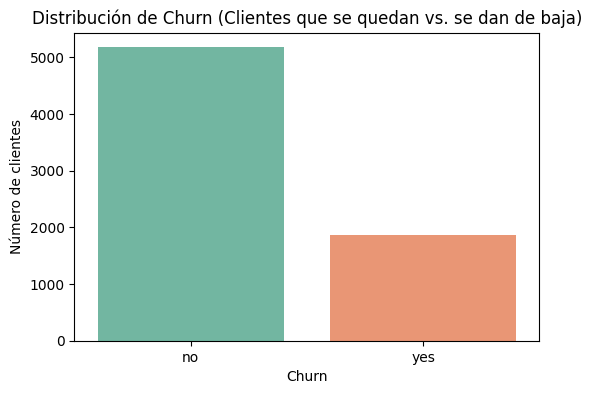

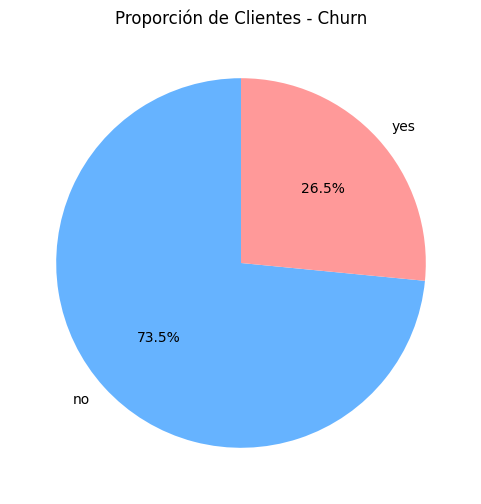

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de clientes por estado de churn
churn_counts = df_clean["Churn"].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df_clean, palette="Set2")
plt.title("Distribución de Churn (Clientes que se quedan vs. se dan de baja)")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()

# Gráfico de pastel (proporciones)
plt.figure(figsize=(6,6))
churn_counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999"])
plt.title("Proporción de Clientes - Churn")
plt.ylabel("")
plt.show()

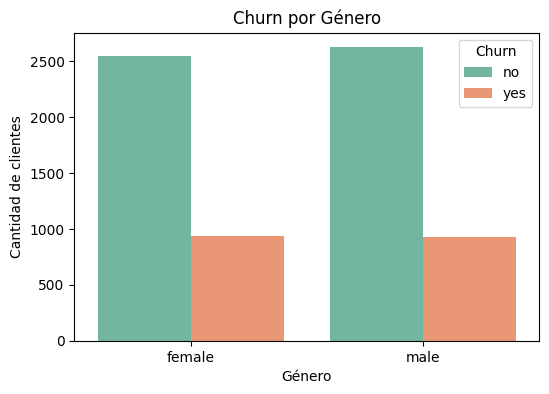

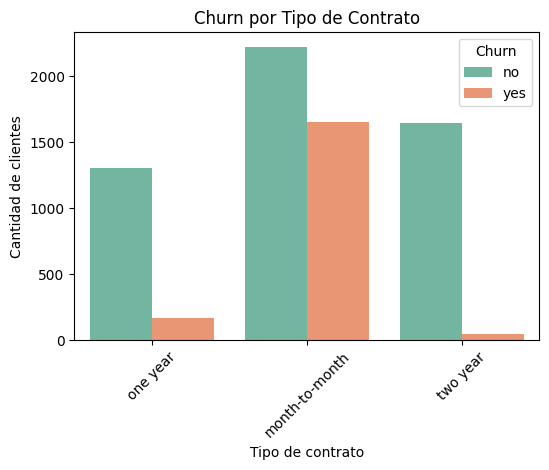

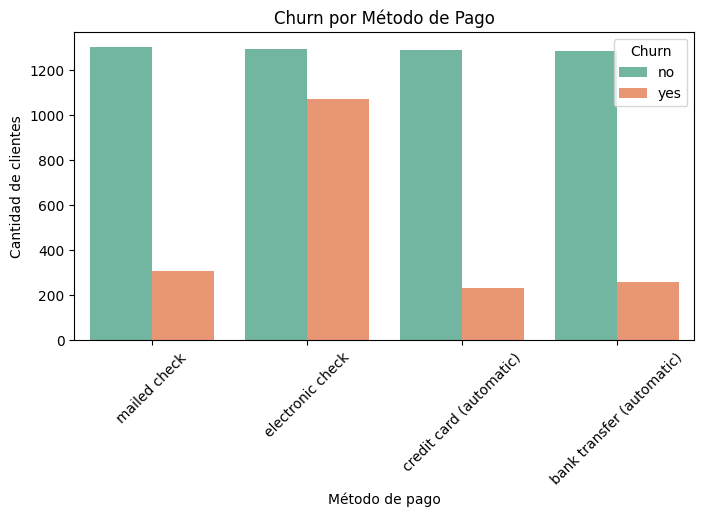

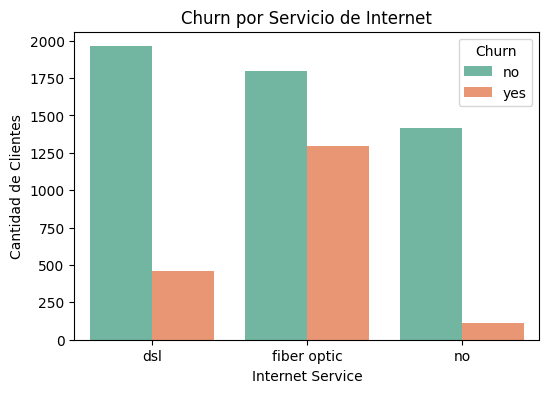

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# 1. Distribución por Género
# =====================
plt.figure(figsize=(6,4))
sns.countplot(x="customer.gender", hue="Churn", data=df_clean, palette="Set2")
plt.title("Churn por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

# =====================
# 2. Distribución por Tipo de Contrato
# =====================
plt.figure(figsize=(6,4))
sns.countplot(x="account.Contract", hue="Churn", data=df_clean, palette="Set2")
plt.title("Churn por Tipo de Contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.show()

# =====================
# 3. Distribución por Método de Pago
# =====================
plt.figure(figsize=(8,4))
sns.countplot(x="account.PaymentMethod", hue="Churn", data=df_clean, palette="Set2")
plt.title("Churn por Método de Pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)
plt.show()
# 4. Distribución de Churn por servicio de internet
plt.figure(figsize=(6,4))
sns.countplot(x="internet.InternetService", hue="Churn", data=df_clean, palette="Set2")
plt.title("Churn por Servicio de Internet")
plt.xlabel("Internet Service")
plt.ylabel("Cantidad de Clientes")
plt.show()

In [ ]:
# Convertir la columna total gastado a numérica
df_clean["account.Charges.Total"] = pd.to_numeric(df_clean["account.Charges.Total"], errors="coerce")


/tmp/ipython-input-690528138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer.tenure", data=df_clean, palette="Set2")


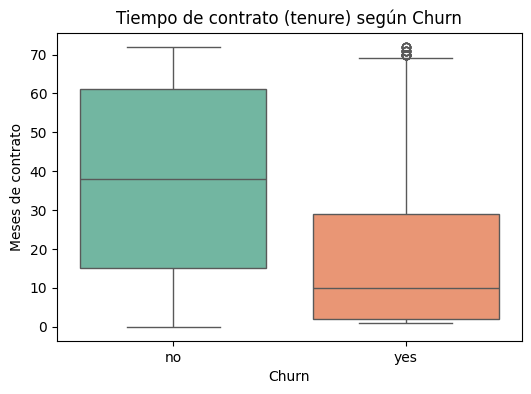

/tmp/ipython-input-690528138.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df_clean, palette="Set2")


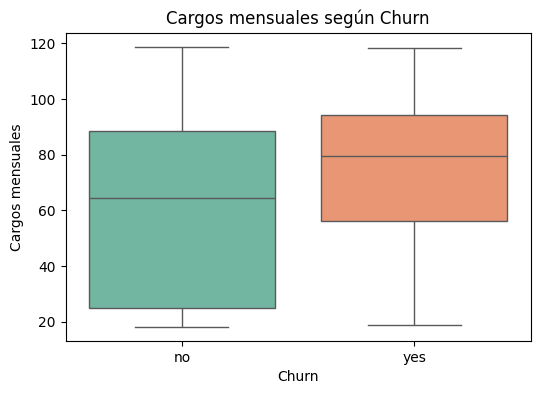

/tmp/ipython-input-690528138.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Total", data=df_clean, palette="Set2")


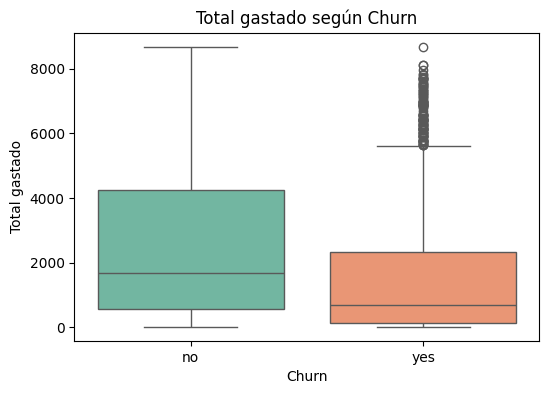

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================
# Tenure vs Churn
# =====================
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="customer.tenure", data=df_clean, palette="Set2")
plt.title("Tiempo de contrato (tenure) según Churn")
plt.xlabel("Churn")
plt.ylabel("Meses de contrato")
plt.show()

# =====================
# Monthly Charges vs Churn
# =====================
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df_clean, palette="Set2")
plt.title("Cargos mensuales según Churn")
plt.xlabel("Churn")
plt.ylabel("Cargos mensuales")
plt.show()

# =====================
# Total Charges vs Churn
# =====================
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df_clean, palette="Set2")
plt.title("Total gastado según Churn")
plt.xlabel("Churn")
plt.ylabel("Total gastado")
plt.show()

In [ ]:
# Resumen estadístico completo
df_clean.groupby("Churn")[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]].describe()



customer.tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
no             5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
yes            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      account.Charges.Monthly             ...                \
                        count       mean  ...   75%     max   
Churn                                     ...                 
no                     5174.0  61.265124  ...  88.4  118.75   
yes                    1869.0  74.441332  ...  94.2  118.35   

      account.Charges.Total                                            \
                      count         mean          std    min      25%   
Churn                                                                   
no                   5163.0  2555.344141  2329.456984  18.80  577.825   
yes                  1869.0  1531.796094  1890.822994  18.85  134.500   

                                   
           50%       75%      max  
Churn                              
no     1683.60  4264.125  8672.45  
yes     703.55  2331.300  8684.80  

[2 rows x 24 columns]

In [ ]:
# Calcular media, mediana, Q1 y Q3
summary = df_clean.groupby("Churn")[["customer.tenure",
                                     "account.Charges.Monthly",
                                     "account.Charges.Total"]].agg(
    mean=("customer.tenure", "mean"),  # temporalmente solo tenure
)

# Forma correcta para todas las variables con varias métricas
summary = df_clean.groupby("Churn")[["customer.tenure",
                                     "account.Charges.Monthly",
                                     "account.Charges.Total"]].agg(
    mean=("customer.tenure", "mean")
)

# ✅ versión final más clara
summary = df_clean.groupby("Churn")[["customer.tenure",
                                     "account.Charges.Monthly",
                                     "account.Charges.Total"]].agg(
    mean=("customer.tenure", lambda x: x.mean()),
    median=("customer.tenure", lambda x: x.median()),
    q1=("customer.tenure", lambda x: x.quantile(0.25)),
    q3=("customer.tenure", lambda x: x.quantile(0.75))
)

print(summary)




            mean  median    q1    q3
Churn                               
no     37.569965    38.0  15.0  61.0
yes    17.979133    10.0   2.0  29.0


In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
# Convertir churn a numérico (1 = sí churn, 0 = no churn)
df['Churn_num'] = df['Churn'].map({'yes': 1, 'no': 0})

# Calcular correlación
correlaciones = df.corr(numeric_only=True)

# Revisar qué variables están más correlacionadas con churn
print(correlaciones['Churn_num'].sort_values(ascending=False))


Churn_num                  1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
customer.tenure           -0.352229
Name: Churn_num, dtype: float64


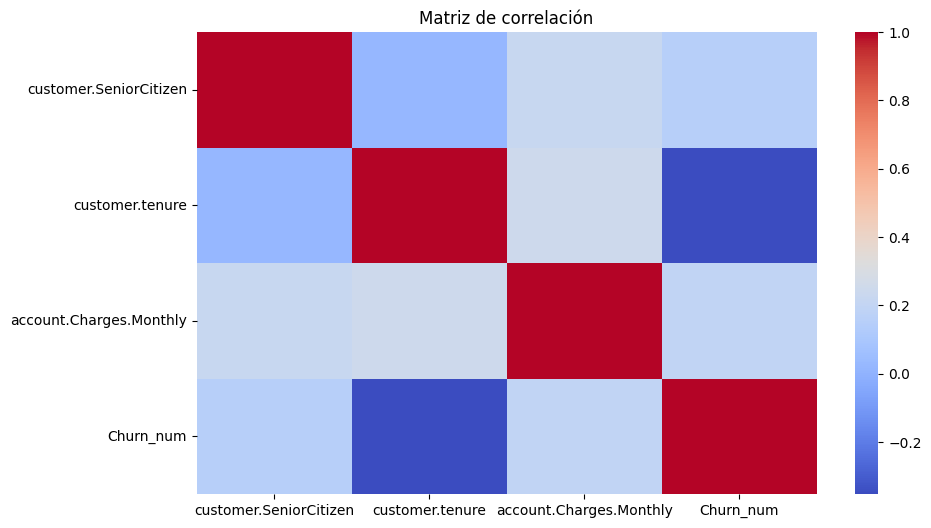

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(correlaciones, cmap="coolwarm", annot=False)
plt.title("Matriz de correlación")
plt.show()


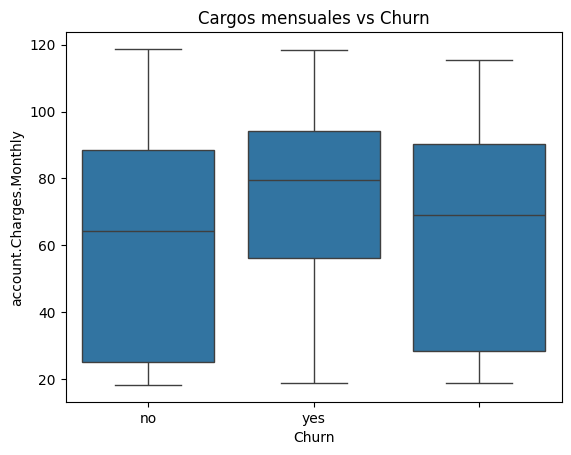

In [ ]:
sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df)
plt.title("Cargos mensuales vs Churn")
plt.show()


#📄Informe final

Retener en los primeros meses es crítico.

Ofertas de fidelización temprana pueden reducir churn.

Segmentar clientes de alto cargo mensual para entender si perciben suficiente valor.

In [10]:
df.to_csv("telecom_limpio.csv", index=False)

In [11]:
print(df.columns.tolist())
print(df.describe())
print(df.info())
print(df.isnull().sum())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000                18.250000
25%                  0.000000         9.000000                35.425000
50%                  0.000000        29.000000                70.300000
75%       

In [13]:
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-orfbo    no          female                       0              yes   
1  0003-mknfe    no            male                       0               no   
2  0004-tlhlj   yes            male                       0               no   
3  0011-igkff   yes            male                       1              yes   
4  0013-exchz   yes          female                       1              yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 yes                9                yes                  no   
1                  no                9                yes                 yes   
2                  no                4                yes                  no   
3                  no               13                yes                  no   
4                  no                3                yes                  no   

  internet.InternetService  ... 

In [14]:
# Eliminar columna customerID
df = df.drop(columns=["customerID"])

# Confirmar que ya no está
print(df.columns)


Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [15]:
import pandas as pd

# === Copiar el dataframe original ===
df_ml = df.copy()

# === 1. Columnas binarias yes/no ===
binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in binarias:
    df_ml[col] = df_ml[col].map({"no": 0, "yes": 1})

# === 2. Género ===
df_ml["customer.gender"] = df_ml["customer.gender"].map({"female": 0, "male": 1})

# === 3. One-Hot Encoding (variables con >2 categorías) ===
multicat = ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']

df_ml = pd.get_dummies(df_ml, columns=multicat, drop_first=True)

# === 4. Revisar resultado ===
print("Shape original:", df.shape)
print("Shape codificado:", df_ml.shape)
print(df_ml.head())

Shape original: (7267, 20)
Shape codificado: (7267, 24)
   Churn  customer.gender  customer.SeniorCitizen  customer.Partner  \
0    0.0                0                       0                 1   
1    0.0                1                       0                 0   
2    1.0                1                       0                 0   
3    1.0                1                       1                 1   
4    1.0                0                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

   phone.MultipleLines  internet.OnlineSecurity  internet.OnlineBackup  ...  \
0                  0.0                      0.0            

In [16]:
# Conteo absoluto
conteo = df_ml["Churn"].value_counts()

# Proporción relativa
proporcion = df_ml["Churn"].value_counts(normalize=True)

print("Conteo:\n", conteo)
print("\nProporción:\n", proporcion)


Conteo:
 Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción:
 Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


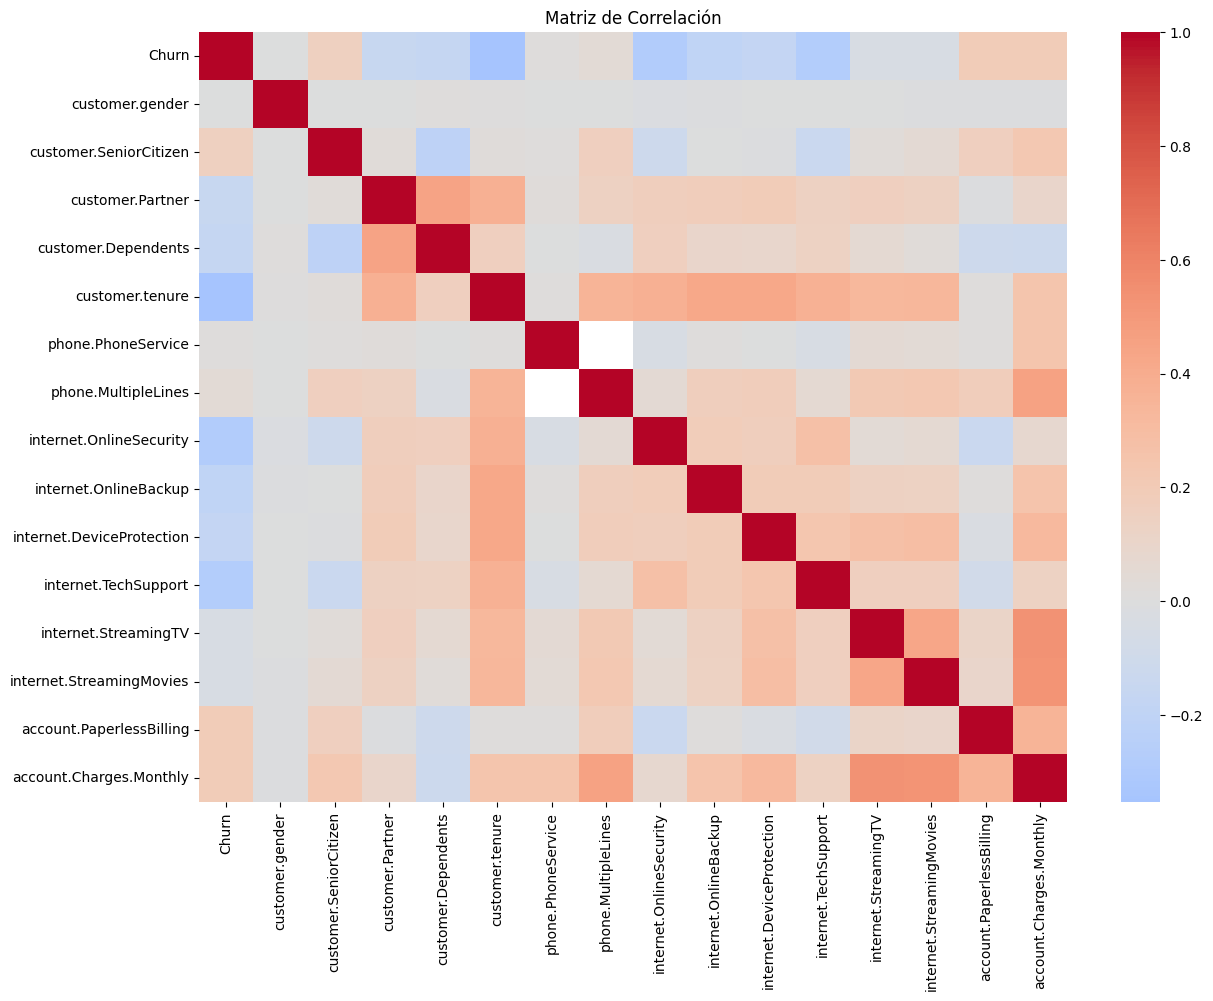

Correlación con Churn:
 Churn                        1.000000
account.Charges.Monthly      0.193356
account.PaperlessBilling     0.191825
customer.SeniorCitizen       0.150889
phone.MultipleLines          0.040207
phone.PhoneService           0.011942
customer.gender             -0.008612
internet.StreamingTV        -0.037057
internet.StreamingMovies    -0.040132
customer.Partner            -0.150448
customer.Dependents         -0.164221
internet.DeviceProtection   -0.177125
internet.OnlineBackup       -0.196061
internet.TechSupport        -0.274422
internet.OnlineSecurity     -0.280816
customer.tenure             -0.352229
Name: Churn, dtype: float64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas
numeric_df = df_ml.select_dtypes(include=['float64','int64'])

# Matriz de correlación
corr_matrix = numeric_df.corr()

# Visualización
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlación")
plt.show()

# Revisamos correlación con la variable objetivo (Churn)
corr_with_churn = corr_matrix["Churn"].sort_values(ascending=False)
print("Correlación con Churn:\n", corr_with_churn)



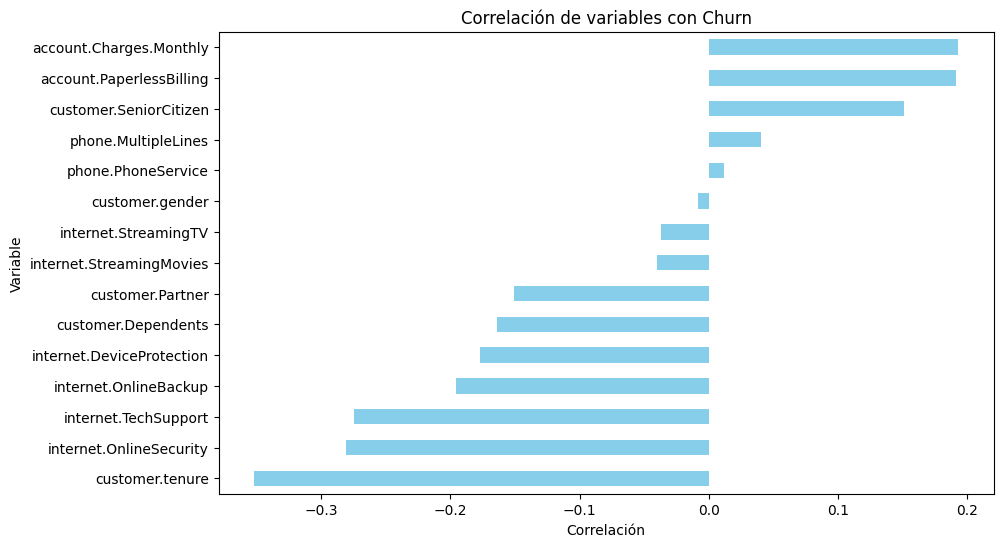

In [19]:
# Gráfico de barras de correlación con Churn
plt.figure(figsize=(10,6))
corr_with_churn.drop("Churn").sort_values().plot(kind='barh', color="skyblue")
plt.title("Correlación de variables con Churn")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()


/tmp/ipython-input-2987005838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="customer.tenure", data=df_ml, palette="Set2")


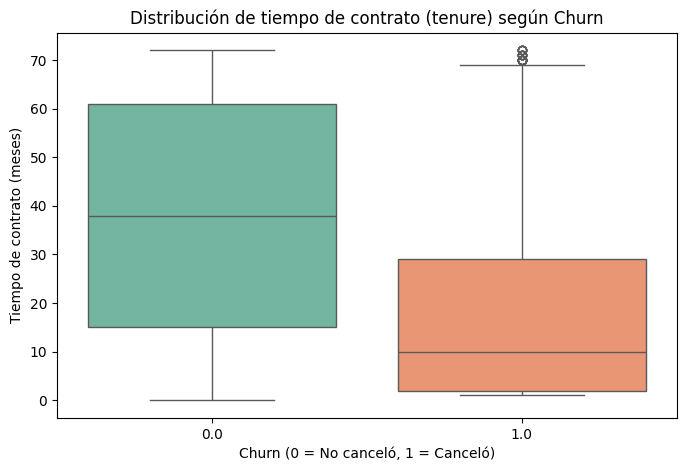

/tmp/ipython-input-2987005838.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="account.Charges.Total", data=df_ml, palette="Set3")


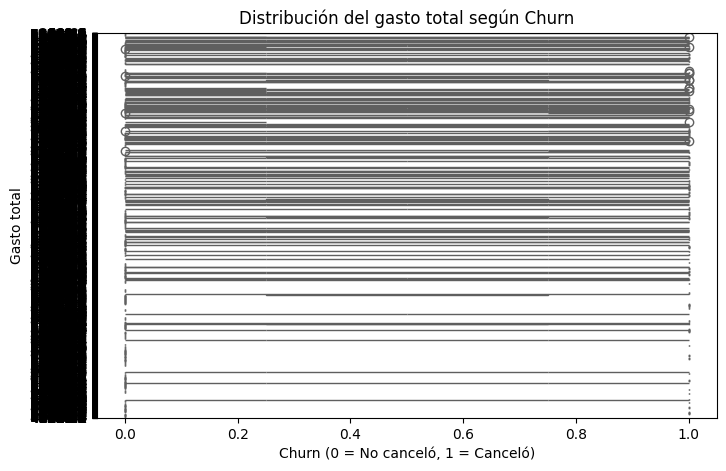

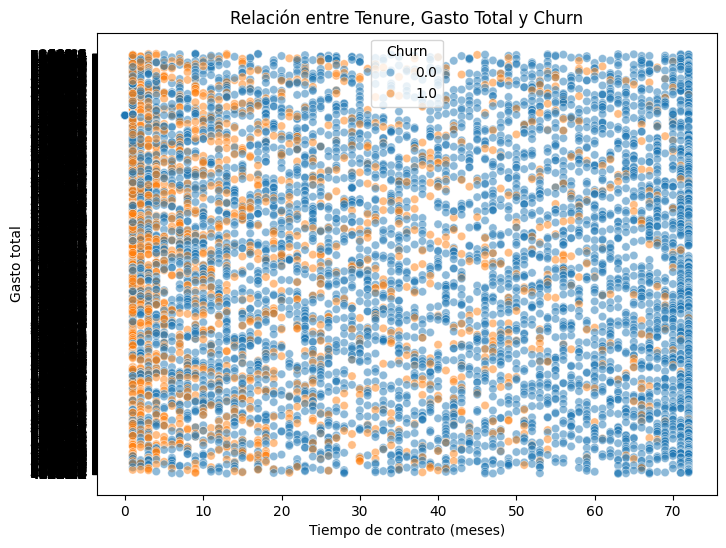

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Tiempo de contrato (tenure) vs Churn ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="customer.tenure", data=df_ml, palette="Set2")
plt.title("Distribución de tiempo de contrato (tenure) según Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# --- 2. Gasto total (TotalCharges) vs Churn ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df_ml, palette="Set3")
plt.title("Distribución del gasto total según Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Gasto total")
plt.show()

# --- 3. Dispersión para ver patrones adicionales ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue="Churn", data=df_ml, alpha=0.5)
plt.title("Relación entre Tenure, Gasto Total y Churn")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")
plt.legend(title="Churn")
plt.show()


In [23]:
# Eliminar filas con NaN en la variable objetivo
df_ml = df_ml.dropna(subset=["Churn"])

# Revisar si quedan NaN
print("NaN en Churn:", df_ml["Churn"].isna().sum())

# Redefinir X e y
X = df_ml.drop("Churn", axis=1)
y = df_ml["Churn"]


NaN en Churn: 0


In [24]:
  from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Distribución en train:\n", y_train.value_counts(normalize=True))
print("Distribución en test:\n", y_test.value_counts(normalize=True))


Tamaño de X_train: (4930, 23)
Tamaño de X_test: (2113, 23)
Distribución en train:
 Churn
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64
Distribución en test:
 Churn
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline

# --- Modelo 1: Regresión Logística con normalización ---
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]

# --- Modelo 2: Random Forest (sin normalización) ---
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# --- Función para imprimir métricas ---
def evaluar_modelo(nombre, y_test, y_pred, y_prob):
    print(f"\n📊 Resultados para {nombre}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

# --- Evaluación de ambos ---
evaluar_modelo("Regresión Logística", y_test, y_pred_lr, y_prob_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf, y_prob_rf)


ValueError: could not convert string to float: ''

In [29]:
# Verificar tipos de datos
print(X_train.dtypes)

# Verificar si hay strings vacíos en alguna columna
print((X_train == '').sum())

# Reemplazar strings vacíos por NaN y luego imputar o convertir
X_train = X_train.replace('', np.nan)
X_test = X_test.replace('', np.nan)

# Si hay NaN, los rellenamos con 0 o la media (mejor imputación con SimpleImputer)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")  # o "mean" si todas son numéricas
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ahora X_train y X_test son arrays numéricos listos para escalar y modelar


customer.gender                                    int64
customer.SeniorCitizen                             int64
customer.Partner                                   int64
customer.Dependents                                int64
customer.tenure                                    int64
phone.PhoneService                                 int64
phone.MultipleLines                              float64
internet.OnlineSecurity                          float64
internet.OnlineBackup                            float64
internet.DeviceProtection                        float64
internet.TechSupport                             float64
internet.StreamingTV                             float64
internet.StreamingMovies                         float64
account.PaperlessBilling                           int64
account.Charges.Monthly                          float64
account.Charges.Total                            float64
internet.InternetService_fiber optic                bool
internet.InternetService_no    

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer

# Reemplazar strings vacíos por NaN en train y test
X_train = X_train.replace('', np.nan)
X_test = X_test.replace('', np.nan)

# Convertir columna account.Charges.Total a numérica (forzando errores a NaN)
X_train["account.Charges.Total"] = pd.to_numeric(X_train["account.Charges.Total"], errors="coerce")
X_test["account.Charges.Total"] = pd.to_numeric(X_test["account.Charges.Total"], errors="coerce")

# Verificar que ya es float
print(X_train["account.Charges.Total"].dtype)

# Imputar valores faltantes con la mediana (más robusto que la media si hay outliers)
imputer = SimpleImputer(strategy="median")
X_train[["account.Charges.Total"]] = imputer.fit_transform(X_train[["account.Charges.Total"]])
X_test[["account.Charges.Total"]] = imputer.transform(X_test[["account.Charges.Total"]])


float64


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# =========================
# 1. Separar X y y
# =========================
X = df_ml.drop("Churn", axis=1)
y = df_ml["Churn"]

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# =========================
# 2. Limpieza de datos
# =========================
# Reemplazar strings vacíos por NaN
X_train = X_train.replace('', np.nan)
X_test = X_test.replace('', np.nan)

# Convertir a numérico la columna problemática
X_train["account.Charges.Total"] = pd.to_numeric(X_train["account.Charges.Total"], errors="coerce")
X_test["account.Charges.Total"] = pd.to_numeric(X_test["account.Charges.Total"], errors="coerce")

# Imputar valores faltantes con mediana
imputer = SimpleImputer(strategy="median")
X_train[["account.Charges.Total"]] = imputer.fit_transform(X_train[["account.Charges.Total"]])
X_test[["account.Charges.Total"]] = imputer.transform(X_test[["account.Charges.Total"]])

# =========================
# 3. Escalado de variables
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 4. Modelos
# =========================

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # RF no necesita escalado
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# =========================
# 5. Evaluación
# =========================
def evaluar_modelo(y_test, y_pred, y_pred_proba, modelo):
    print(f"\n🔹 Resultados para {modelo}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("AUC      :", roc_auc_score(y_test, y_pred_proba))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_lr, y_pred_proba_lr, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
import pandas as pd
import numpy as np

# Copia de trabajo
base = df.copy()

# 1) Limpiar/asegurar columna objetivo
base["Churn"] = base["Churn"].str.strip().str.lower().map({"no":0, "yes":1})
# (si hubiera vacíos, se eliminan)
base = base.dropna(subset=["Churn"])

# 2) Quitar columna irrelevante
base = base.drop(columns=["customerID"], errors="ignore")

# 3) Cast de numéricos
base["account.Charges.Total"] = pd.to_numeric(base["account.Charges.Total"], errors="coerce")

# 4) Identificar categóricas (object)
cat_cols = base.select_dtypes(include="object").columns.tolist()

# 5) One-hot encoding (drop_first para evitar colinealidad)
df_encoded = pd.get_dummies(base, columns=cat_cols, drop_first=True)

# 6) Separar X, y
y = df_encoded["Churn"].astype(int)
X = df_encoded.drop(columns=["Churn"])

print("Shape X, y:", X.shape, y.shape)
print("¿Objetos en X?:", X.select_dtypes(include="object").shape[1])
print("Nulos en X:\n", X.isna().sum().sort_values(ascending=False).head())


Shape X, y: (7043, 30) (7043,)
¿Objetos en X?: 0
Nulos en X:
 account.Charges.Total      11
customer.SeniorCitizen      0
customer.tenure             0
account.Charges.Monthly     0
customer.gender_male        0
dtype: int64


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Split estratificado 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Imputar (por si account.Charges.Total u otras tienen NaN)
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

print("Tamaños -> X_train:", X_train.shape, "X_test:", X_test.shape)
print("Nulos post-imputación (train):", X_train.isna().sum().sum())
print("Distribución y_train:\n", y_train.value_counts(normalize=True))


Tamaños -> X_train: (4930, 30) X_test: (2113, 30)
Nulos post-imputación (train): 0
Distribución y_train:
 Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [36]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp.head(15))


account.Charges.Total                     0.177441
customer.tenure                           0.169829
account.Charges.Monthly                   0.147108
account.Contract_two year                 0.059148
internet.InternetService_fiber optic      0.039391
account.PaymentMethod_electronic check    0.036797
account.Contract_one year                 0.031365
customer.gender_male                      0.026245
internet.OnlineSecurity_yes               0.025095
account.PaperlessBilling_yes              0.025062
internet.TechSupport_yes                  0.024765
customer.Partner_yes                      0.021870
customer.Dependents_yes                   0.020537
internet.OnlineBackup_yes                 0.020128
customer.SeniorCitizen                    0.017639
dtype: float64


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de árbol
tree_clf = DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    random_state=42
)

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def calcular_metricas(y_true, y_pred, y_prob, modelo):
    return {
        "Modelo": modelo,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

# Métricas para LR y Árbol
metrics_lr = calcular_metricas(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
metrics_tree = calcular_metricas(y_test, y_pred_tree, y_prob_tree, "Decision Tree")


In [39]:
import pandas as pd

df_results = pd.DataFrame([metrics_lr, metrics_tree])
print(df_results)


                Modelo  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression  0.735447   0.501116  0.800357  0.616335  0.840651
1        Decision Tree  0.734974   0.500565  0.789661  0.612725  0.828108


NameError: name 'y_pred_dt' is not defined

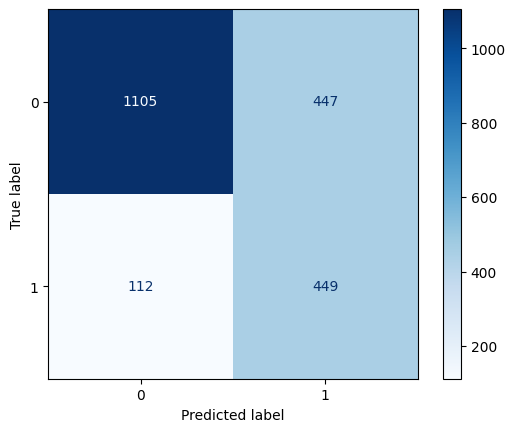

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=pipe_lr.classes_)
disp_lr.plot(cmap="Blues")

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=tree.classes_)
disp_dt.plot(cmap="Oranges")


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Definir y entrenar el árbol de decisión
tree = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_dt = tree.predict(X_test)
y_prob_dt = tree.predict_proba(X_test)[:, 1]


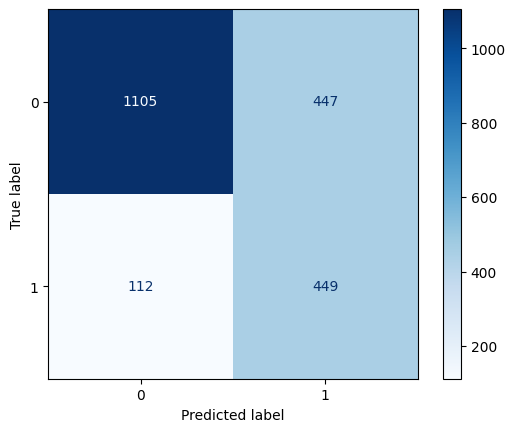

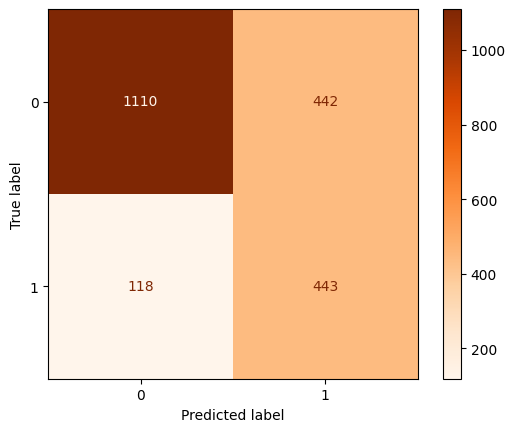

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=pipe_lr.classes_)
disp_lr.plot(cmap="Blues")

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=tree.classes_)
disp_dt.plot(cmap="Oranges")


In [46]:
print(pipe_lr.named_steps.keys())



dict_keys(['scaler', 'clf'])


Basándonos en el análisis de correlación con la variable Churn, se identifican los siguientes factores con mayor influencia en la decisión de los clientes de cancelar sus servicios:

Factores que Aumentan la Probabilidad de Churn (Correlación Positiva):
account.Charges.Monthly (0.193356): Los cargos mensuales más altos están positivamente correlacionados con la cancelación. Esto sugiere que a medida que la factura mensual de un cliente aumenta, también lo hace su propensión a buscar alternativas o a cancelar el servicio.

account.PaperlessBilling (0.191825): La facturación sin papel también muestra una correlación positiva con el churn. Esto podría indicar que los clientes que eligen esta opción son quizás más jóvenes, más digitales y, por lo tanto, más propensos a cambiar de proveedor si encuentran una oferta mejor o experimentan insatisfacción.

customer.SeniorCitizen (0.150889): Los clientes de la tercera edad presentan una ligera mayor tendencia a cancelar. Esto podría estar relacionado con necesidades de servicio específicas, cambios en el estilo de vida o menor familiaridad con nuevas ofertas.

phone.MultipleLines (0.040207) y phone.PhoneService (0.011942): Aunque con correlaciones muy bajas, la presencia de múltiples líneas o el servicio telefónico en general están ligeramente asociados con el churn.

Factores que Disminuyen la Probabilidad de Churn (Correlación Negativa):
customer.tenure (-0.352229): La antigüedad del cliente es el factor más fuertemente correlacionado negativamente con el churn. Esto es un hallazgo crítico: cuanto más tiempo ha sido un cliente de TelecomX LATAM, menor es su probabilidad de cancelar. Esto refuerza la importancia de la fidelización a largo plazo.

internet.OnlineSecurity (-0.280816) y internet.TechSupport (-0.274422): La contratación de seguridad en línea y soporte técnico se asocia fuertemente con una menor probabilidad de churn. Estos servicios adicionales evidentemente añaden un valor percibido significativo, haciendo que los clientes se sientan más seguros y apoyados.

internet.OnlineBackup (-0.196061) y internet.DeviceProtection (-0.177125): Los servicios de copia de seguridad en línea y protección de dispositivos también contribuyen a una menor tasa de cancelación. Esto subraya la importancia de los servicios de valor añadido relacionados con la protección de datos y equipos.

customer.Dependents (-0.164221) y customer.Partner (-0.150448): Los clientes con dependientes y aquellos que tienen pareja (Partner) muestran una menor tendencia a cancelar. Esto podría implicar que los hogares con mayor número de miembros o con responsabilidades compartidas valoran más la estabilidad del servicio.

internet.StreamingTV (-0.037057) y internet.StreamingMovies (-0.040132): Aunque con correlaciones muy bajas, la contratación de servicios de streaming de TV o películas se asocia ligeramente con una menor probabilidad de churn.